In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files

# Load in the necessary data

## The model results summaries

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'

results_df = pd.read_csv(os.path.join(datadir, 'p_models', 'selected_features', 'all.stat.results.csv'))
results_allfeats_df = pd.read_csv(os.path.join(datadir, 'p_models','all_features', 'all.stat.results.csv'))

In [4]:
results_df.head()

,cv_mean_best,cv_std_best,cv_ind_sel,cv_mean_sel,cv_std_sel,C_best,gamma_best,C_sel,gamma_sel,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.915035,0.005912,24,0.912131,0.004841,10.0,0.10,1.0,0.1,0.932,0.147,0.915,0.164,0.884,0.198,YHB,P
1,0.821419,0.018538,24,0.821419,0.018538,1.0,0.10,1.0,0.1,0.859,0.211,0.834,0.220,0.044,0.577,YDC,P
2,0.903960,0.006974,24,0.903960,0.006974,1.0,0.10,1.0,0.1,0.925,0.157,0.914,0.164,0.816,0.239,YWB,P
3,0.904138,0.005449,24,0.904138,0.005449,1.0,0.10,1.0,0.1,0.924,0.153,0.912,0.166,0.835,0.235,MCID,P
4,0.900035,0.013180,24,0.896342,0.011197,100.0,0.01,1.0,0.1,0.922,0.157,0.901,0.171,0.816,0.250,YHL,P


## The example counts

In [3]:
## READ IN DF FOR COUNTS ##
split_cnts = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.station.ex.counts.csv'))
df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.2022.csv'))
####
# Count 2022 stations, merge with train and test cnts
split_cnts = split_cnts.merge(
    df_2022.groupby('station')['event_identifier'].count().reset_index().rename(
        columns={'event_identifier': 'cnt_holdout'}), on='station', how='left')
# Filter to stations with trained models
split_cnts = split_cnts[split_cnts['station'].isin(results_df.station)]
# Fill Nan values with 0
split_cnts['cnt_holdout'] = split_cnts['cnt_holdout'].fillna(0)
# Change cnt types to int
split_cnts = split_cnts.astype({'cnt_train': int, 'cnt_test':int, 'cnt_holdout':int})
split_cnts.head()

,station,cnt_train,cnt_test,cnt_holdout
0,YNR,4009,1008,17
1,YHH,4005,1002,185
2,YMC,3553,898,181
3,YMR,3393,845,177
4,YPM,3358,843,172


## The model predictions

In [6]:
all_stats = results_df['station']
pred_path = os.path.join(datadir,'p_models', 'selected_features')
train_preds_df = combine_prediction_files(all_stats, pred_path,'P', 'train')
test_preds_df = combine_prediction_files(all_stats, pred_path,'P', 'test')
train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.750680,YHB
1,60001352,2.250510,2.150472,YHB
2,60001367,2.155231,2.148788,YHB
3,60001392,2.076413,1.522121,YHB
4,60001397,2.273901,2.196029,YHB
...,...,...,...,...
492,60434112,0.910973,0.921659,YDD
493,60456872,3.207673,3.307287,YDD
494,60456897,2.121661,2.353166,YDD
495,60456907,3.098341,3.198398,YDD


In [8]:
holdout_preds_df = combine_prediction_files(df_2022['station'].unique(), pred_path,'P', 'holdout')
holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60475807,2.403296,2.296476,YMS
1,60480922,2.448282,2.399605,YMS
2,60481752,1.389860,1.633909,YMS
3,60483757,2.233690,2.453516,YMS
4,60483842,1.960314,2.175337,YMS
...,...,...,...,...
12,60506742,1.450397,1.573381,YNR
13,60507132,1.052885,1.286814,YNR
14,60505222,0.488491,0.547220,YNR
15,60505332,0.480386,0.810478,YNR


# Look at the scores from various splits

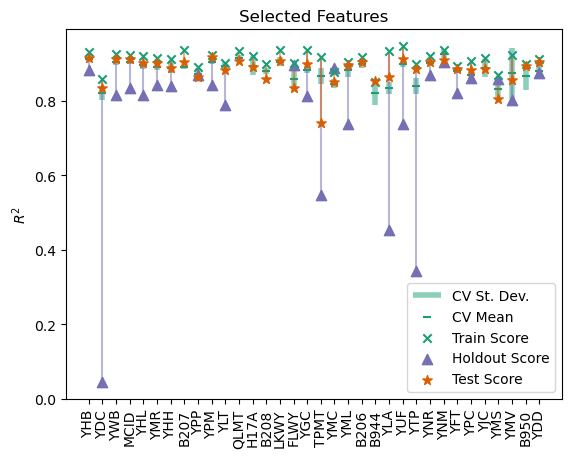

In [5]:
plotting.plot_station_splits_scores_scatter(results_df, title='Selected Features', vlines=True)

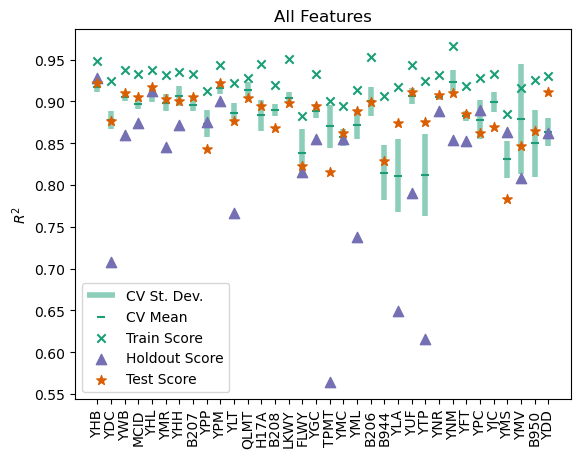

In [6]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, title='All Features')

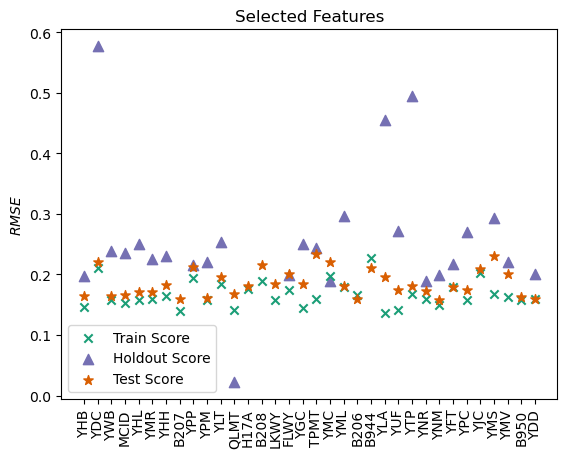

In [7]:
plotting.plot_station_splits_scores_scatter(results_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='Selected Features')

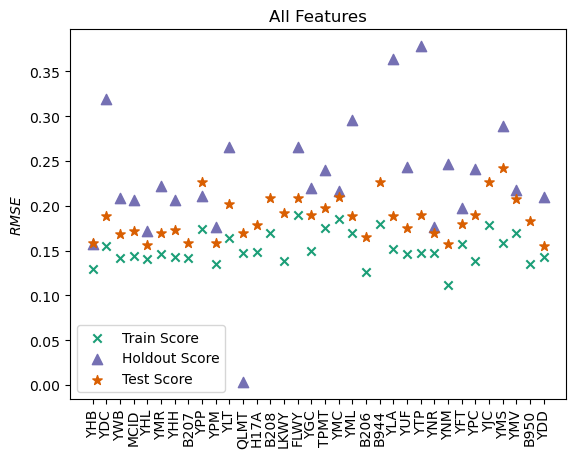

In [8]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='All Features')

# Compare the scores of a single split using different features

Index(['station', 'train_r2_x', 'train_r2_y'], dtype='object')


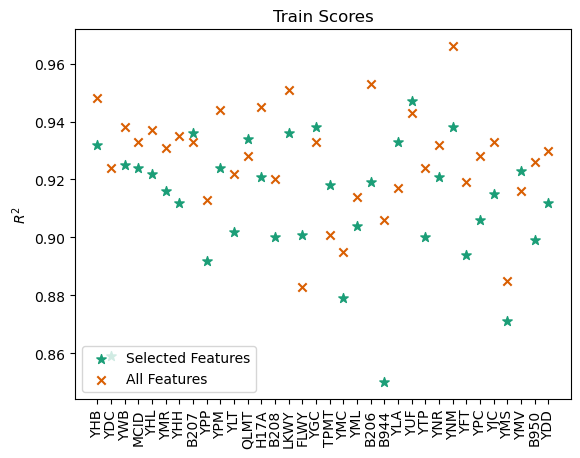

In [9]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='train_r2',
                               title='Train Scores'
                               )

Index(['station', 'test_r2_x', 'test_r2_y'], dtype='object')


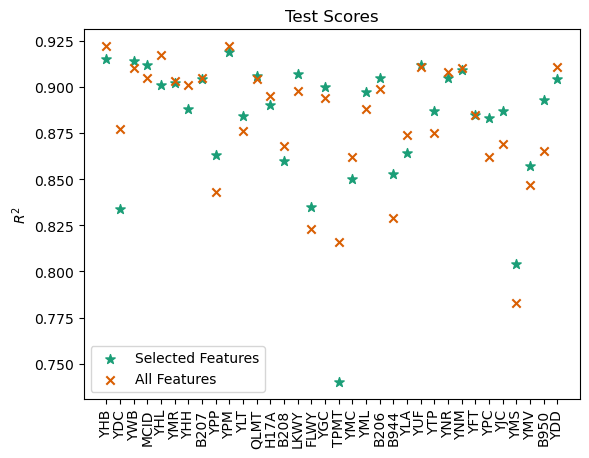

In [10]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               title='Test Scores'
                               )

Index(['station', 'holdout_r2_x', 'holdout_r2_y'], dtype='object')


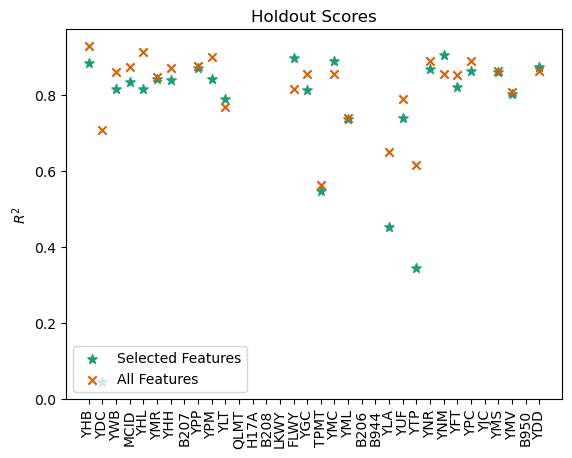

In [11]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='holdout_r2',
                               title='Holdout Scores'
                               )

In [12]:
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# # Barchart of scores
# # Based off of 
# # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# width = 0.25  # the width of the bars
# multiplier = 0

# #colors = ['#1b9e77', '#d95f02', '#7570b3']
# #colors = ['#66c2a5', '#fc8d62', '#8da0cb']
# #colors = ['#a6cee3', '#1f78b4', '#b2df8a']
# colors = ['#edf8b1', '#7fcdbb', '#2c7fb8']

# df = results_df

# fig, ax = plt.subplots(layout='constrained', figsize=(5, 8))
# y =np.arange(results_df['station'].shape[0])

# for i, col in enumerate(['holdout_r2', 'test_r2', 'train_r2']):
#     offset = width * multiplier
#     rects = ax.barh(y + offset, results_df[col], width, label=col, color=colors[i])
#     #ax.bar_label(rects, padding=3)
#     multiplier += 1
    
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel(f'$R^2$')
# ax.set_title('Selected Features')
# ax.set_yticks(y + width, results_df['station'])
# ax.set_yticklabels(results_df['station'])
# ax.legend(loc='upper left', ncols=3)
# ax.set_xlim([0, 1.0])
# ax.set_ylim([-0.5, np.max(y)+2.5])
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.grid(which='both', axis='x', zorder=0)
# plt.show()

In [13]:
# plotting.scores_heatmap(results_df.sort_values('station'),
#                         midpoint_normalize=True,
#                         midpoint=0.8,
#                         cmap_min=0,
#                         title='Selected Features',
#                         cbar_label=f'$R^2$'
#                         )

# plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
#                         midpoint_normalize=True,
#                         midpoint=0.8,
#                         cmap_min=0,
#                         title='All Features',
#                         cbar_label=f'$R^2$'
#                         )

# Make tables/heatmaps to compare the scores

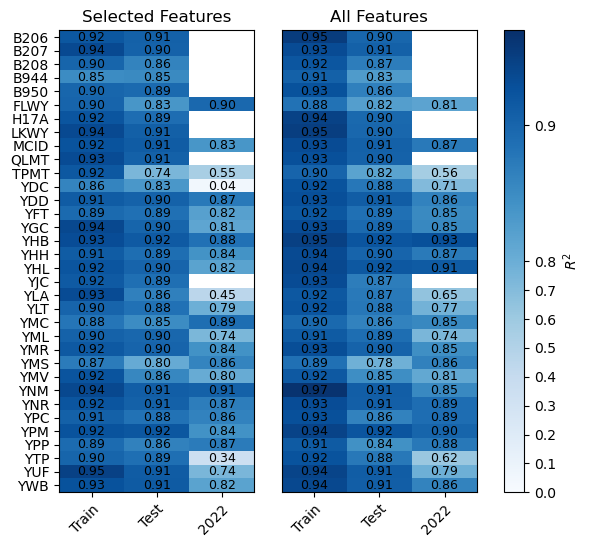

In [22]:
fig, axes = plt.subplots(1, 3, width_ratios=[2, 2, 0.2], figsize=(6, 6))

midpoint_normalize = True
midpoint = 0.8
cmap_min = 0
cmap_max = 0.97
xlabels=['Train', 'Test', '2022']

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Selected Features',
                        ax=axes[0],
                        show_ylabels=True,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
im2 = plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='All Features',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
plt.colorbar(im2, cax=axes[2], label=f'$R^2$', ticks=np.arange(0, 1.0, 0.1))
#fig.tight_layout()
fig.show()

cmap min set to -0.6639999999999999


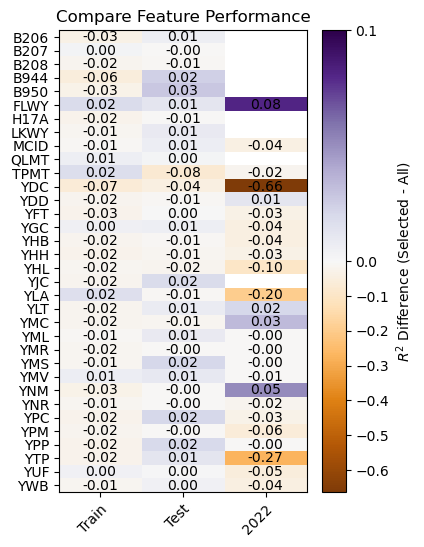

In [15]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']

im = plotting.scores_heatmap(diff_df,
                        midpoint_normalize=True,
                        midpoint=0,
                        cmap_max = 0.1,
                        cmap_min = None,
                        title='Compare Feature Performance',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'$R^2$ Difference (Selected - All)',
                        cmap=cm.PuOr,
                        tablefontcolor='k',
                        tablefontsize=None,
                        tight_layout=True)


cmap midpoint set to 284.5
cmap min set to 0
cmap max set to 4009


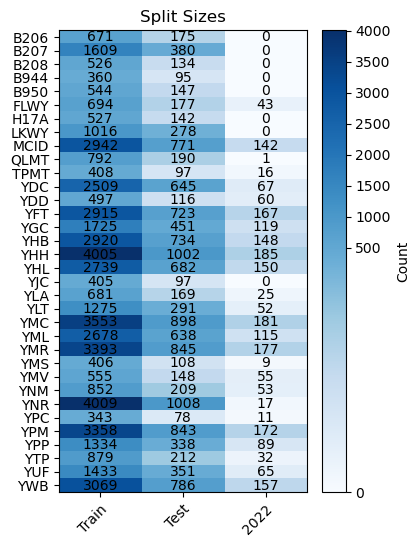

In [21]:
im = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=True,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=None,
                        tight_layout=True,
                        tablevalueprec=0)
                        


cmap min set to -0.6639999999999999
cmap midpoint set to 284.5
cmap min set to 0
cmap max set to 4009


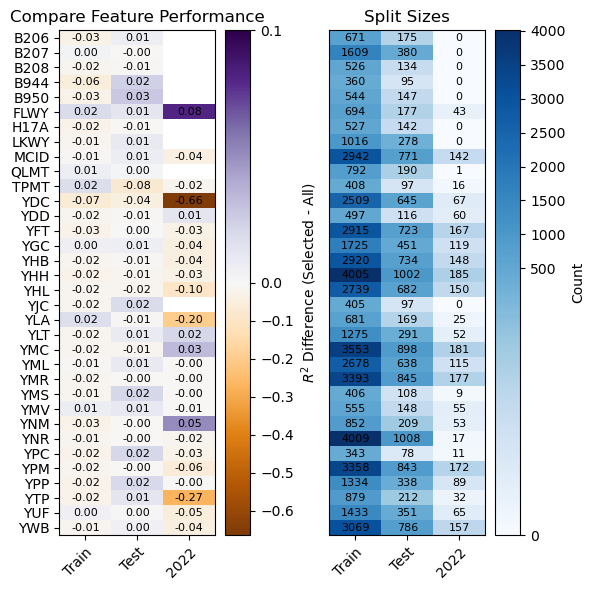

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6)) #, width_ratios=[2, 2, 0.2], figsize=(6, 6))

im1 = plotting.scores_heatmap(diff_df,
                             ax = axes[0],
                            midpoint_normalize=True,
                            midpoint=0,
                            cmap_max = 0.1,
                            cmap_min = None,
                            title='Compare Feature Performance',
                            show_ylabels=True,
                            show_cbar=True,
                            xticklabels=xlabels,
                            cbar_label=f'$R^2$ Difference (Selected - All)',
                            cmap=cm.PuOr,
                            tablefontcolor='k',
                            tablefontsize=8,
                            tight_layout=True,
                            )

im2 = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        ax=axes[1],
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=True,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=False,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=8,
                        tight_layout=True,
                        tablevalueprec=0)

fig.tight_layout()

# Actual vs predicted plots

In [140]:
from matplotlib import patches

In [170]:
def actual_v_predicted_P(results_df,
                         all_train_df,
                         all_test_df,
                         all_holdout_df = None,
                         n_cols=6,
                         title=None,
                         tick_locations=[0, 2, 4],
                         inner_ticks_on=True,
                         axis_lims=[-0.2, 5],
                         legend_names=['Train', 'Test', 'Holdout'],
                         colors = ['lightgray', 'C0', 'C1'],
                         alphas = [0.5, 0.5, 0.5],
                         legend_bbox_width=3):

    inner_tick_locations = []
    if inner_ticks_on:
        inner_tick_locations = tick_locations

    # Set up the figure axes
    n_stats = len(results_df)
    n_rows = int(np.ceil((n_stats)/n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 11), constrained_layout=True)
    axes = axes.flatten()

    # When the number of stations does not evenly fit into the n_cols*n_rows,
    # remove extra axes from the upper left corner 
    # Get the ax inds to turn off and add 'null' into the station list
    stat_list = results_df['station'].tolist()
    ignore_inds = []
    for i in range(int(n_rows*n_cols - n_stats), 0, -1): 
        ignore_inds.append(n_cols-i)
        stat_list.insert(n_cols-i, "null")

    i = 0
    legend = False
    for cnt, station in enumerate(stat_list):
        ax = axes[cnt]
        ax.set_xlim(axis_lims)
        ax.set_ylim(axis_lims)
        # Turn of the extra axes
        if cnt in ignore_inds:
            if not legend:
                legend_symbol_x = 1.0
                legend_label_x = legend_symbol_x + 0.35
                legend_symbol_max_y = 3.05
                legend_symbol_spacing_y = 0.75
                legend_label_shift_y = 0.15
                bbox_pad = 0.2
               # bbox_x_length = 3
                for legend_i in range(3):
                    symbol_pos_y = legend_symbol_max_y-legend_i*legend_symbol_spacing_y
                    text_pos_y = symbol_pos_y - legend_label_shift_y
                    ax.scatter(legend_symbol_x, symbol_pos_y, 
                            color=colors[legend_i], 
                            alpha=alphas[legend_i])
                    ax.text(legend_label_x, text_pos_y, legend_names[legend_i], fontsize=12)

                rect = patches.Rectangle((legend_symbol_x-2*bbox_pad, text_pos_y-bbox_pad),
                                         width=legend_bbox_width,
                                         height=(legend_symbol_max_y+3*bbox_pad)-text_pos_y,
                                         linewidth=1,
                                         edgecolor='k',
                                         facecolor='none')
                ax.add_patch(rect)

                legend = True
                ax.plot([])
            ax.axis('off')
            continue
        
        # Get the predictions for one station
        results_row = results_df[results_df['station'] == station]
        train_df = all_train_df[all_train_df['station'] == station]
        test_df = all_test_df[all_test_df['station'] == station]
        holdout_df = None
        if (all_holdout_df is not None) and (station in all_holdout_df['station'].unique()):
            holdout_df = all_holdout_df[all_holdout_df['station'] == station]

        # Set ticks & labels - axes on the outer edge should have labels
        if cnt < len(stat_list) - n_cols:
            ax.set_xticks(inner_tick_locations, labels=[])
        else:
            ax.set_xticks(tick_locations)
        if (cnt % n_cols != 0):
            ax.set_yticks(inner_tick_locations, labels=[])

        ax.scatter(train_df['magnitude'], 
                train_df['predicted_magnitude'], 
                label=legend_names[0], 
                color=colors[0], 
                alpha=alphas[0])

        ax.scatter(test_df['magnitude'], 
                test_df['predicted_magnitude'], 
                label=legend_names[1], 
                color=colors[1], 
                alpha=alphas[1])
        
        if holdout_df is not None:
            ax.scatter(holdout_df['magnitude'], 
                    holdout_df['predicted_magnitude'], 
                    label=legend_names[2], 
                    color=colors[2], 
                    alpha=alphas[2])
            
        # ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
        # max_ls = "--"
        # if len(train_df[train_df.magnitude>4.3]) > 0:
        #     max_ls = ":"    
        # ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

        ax.plot(np.arange(axis_lims[0], axis_lims[1], 0.5), 
                np.arange(axis_lims[0], axis_lims[1], 0.5), 
                color="k")
        ax.text(1.5, 
                4.2, 
                station, 
                fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

        # We change the fontsize of minor ticks label 
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=8)

        ax.text(1.8, 0.01, 
                f"{results_row['test_r2'].values[0]:1.2f}", 
                color=colors[1], 
                fontsize=12)
        if holdout_df is not None:
            ax.text(3.2, 0.01, 
                    f"{results_row['holdout_r2'].values[0]:1.2f}", 
                    color=colors[2],
                    fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

        ax.set_aspect('equal', adjustable='box')
        
    fig.supxlabel(r"Actual $M_L$", fontsize=16)
    fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
    fig.suptitle(title, fontsize=16, y=1.02)

    if not legend:
        ax.legend(loc=(1.2, 0), fontsize=12, handletextpad=0.5, borderpad=0.05, 
                borderaxespad=0.05, handlelength=0.5)


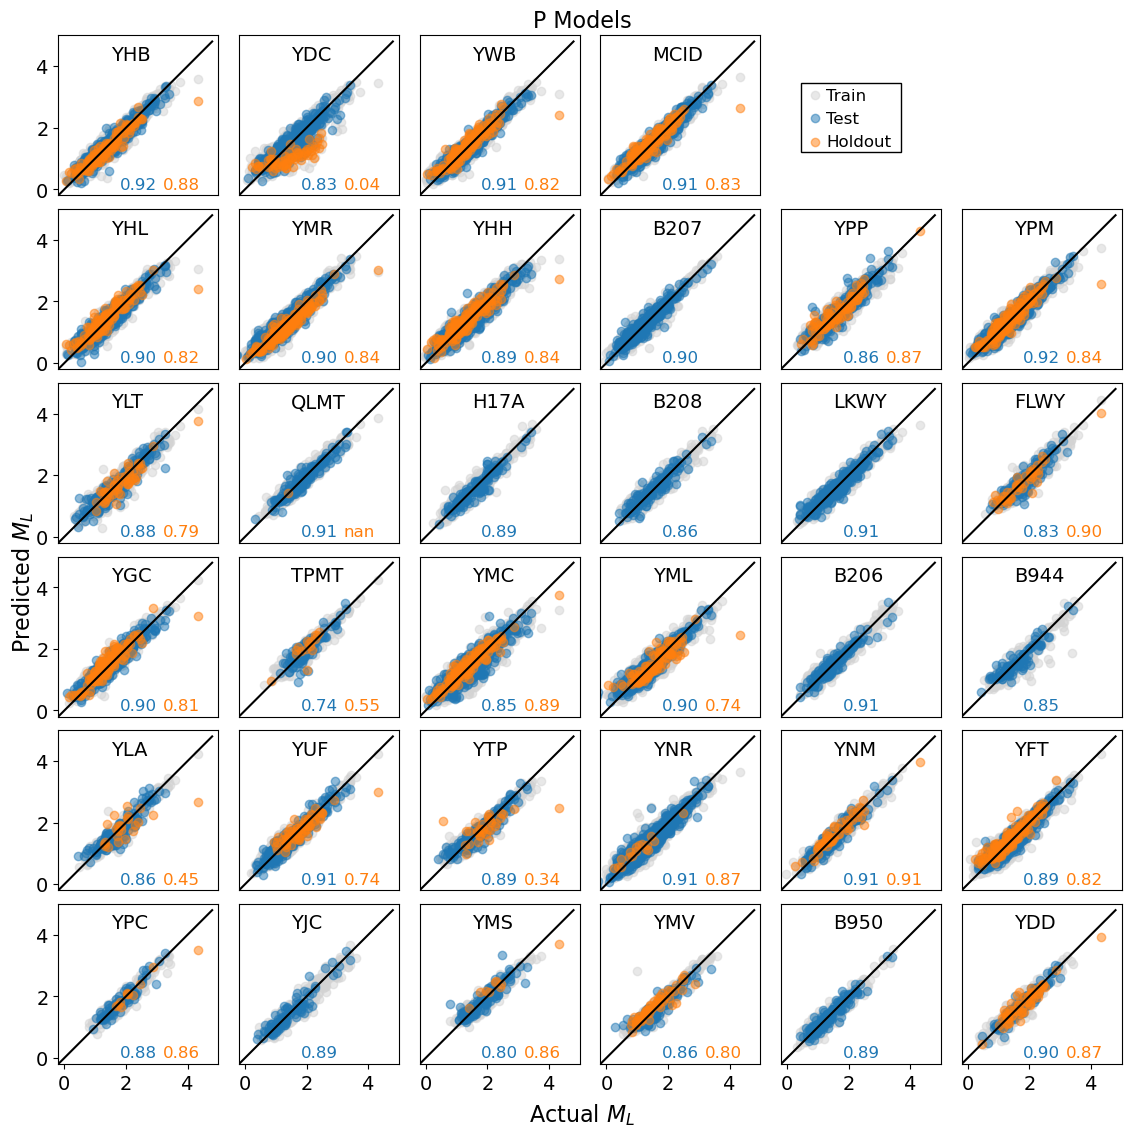

In [172]:
actual_v_predicted_P(results_df,
                     train_preds_df, 
                     test_preds_df,
                     holdout_preds_df,
                     inner_ticks_on=False,
                     title='P Models')